In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(airbnbDataSet_filename, header=0)
pd.set_option('display.max_columns', None)
df.columns
df.head(10)

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,8.0,True,True,Manhattan,Entire home/apt,1,1.0,NaN,1.0,"[""Extra pillows and blankets"", ""Baking sheet"",...",150.0,30,1125,30.0,30.0,1125.0,1125.0,30.0,1125.0,True,3,33,63,338,48,0,0,4.70,4.62,4.76,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1.0,1.0,True,True,Brooklyn,Entire home/apt,3,1.0,1.0,3.0,"[""Extra pillows and blankets"", ""Luggage dropof...",75.0,1,730,1.0,1.0,730.0,730.0,1.0,730.0,True,3,6,18,194,409,32,0,4.45,4.49,4.78,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1.0,1.0,True,True,Brooklyn,Entire home/apt,4,1.5,2.0,2.0,"[""Kitchen"", ""BBQ grill"", ""Cable TV"", ""Carbon m...",275.0,5,1125,5.0,5.0,1125.0,1125.0,5.0,1125.0,True,3,3,12,123,2,1,0,5.00,5.00,5.00,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1.0,1.0,True,True,Manhattan,Private room,2,1.0,1.0,1.0,"[""Room-darkening shades"", ""Lock on bedroom doo...",68.0,2,14,2.0,2.0,14.0,14.0,2.0,14.0,True,1,16,34,192,507,33,2,4.21,3.73,4.66,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1.0,1.0,True,True,Manhattan,Private room,1,1.0,1.0,1.0,"[""Breakfast"", ""Carbon monoxide alarm"", ""Fire e...",75.0,2,14,2.0,2.0,14.0,14.0,2.0,14.0,True,0,0,0,0,118,0,0,4.91,4.82,4.97,4.95,4.94,4.92,False,1,0,1,0,0.87,7
5,"Lovely Room 1, Garden, Best Area, Legal rental","Beautiful house, gorgeous garden, patio, cozy ...",Neighborhood is amazing!<br />Best subways to ...,Laurie,"New York, New York, United States","Hello, \r\nI will be welcoming and helpful, w...",1.00,1.00,True,3.0,3.0,True,True,Brooklyn,Private room,2,1.5,1.0,NaN,"[""Gym nearby"", ""Backyard"", ""Outdoor furniture""...",98.0,4,21,4.0,4.0,21.0,21.0,4.0,21.0,True,2,17,47,322,204,23,2,4.70,4.61,4.79,4.82,4.87,4.73,False,3,1,2,0,1.48,7
6,Only 2 stops to Manhattan studio,Comfortable studio apartment with super comfor...,NaN,Allen & Irina,"New York, New York, United States",We love to travel. When we tra

## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

I have chosen the Airbnb data set. I am going to predict the price of an airbnb. This is a regression problem since we are predicting the output of a contiguous value. I am going to use all the other columns as features for now. This is an important problem because price prediction models are crucial for company's to determine how to make the best profit and appeal to customers. This information can be used to price airbnbs correctly and as a result, bookings could increase and profits could be made for the company.


## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [3]:
list(df.columns)

['name',
 'description',
 'neighborhood_overview',
 'host_name',
 'host_location',
 'host_about',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_listings_count',
 'host_total_listings_count',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood_group_cleansed',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'amenities',
 'price',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'has_availability',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'number_of_reviews_l30d',
 'review_scores_rating',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'instant_bookable',
 'calculated_host_listings_count',
 'cal

Looking at the columns listed, I think neighborhood group cleansed and room type are both important metrics to determine the pricing of an airbnb logically.
However, these are in object format so we need to use one hot encoding to transform these into numeric data. Let's see if these are cateogorical variables that can easily be transformed to binary using one-hot encoding. If there are a lot of unique values, one hot encoding is not ideal for these variables.

In [4]:
print(df['neighbourhood_group_cleansed'].unique())
print(df['room_type'].unique())

['Manhattan' 'Brooklyn' 'Queens' 'Staten Island' 'Bronx']
['Entire home/apt' 'Private room' 'Hotel room' 'Shared room']


We can use one hot encoding! I plan on doing this in the data preparation and using these two columns as features.

Now I want to see if there are any missing values. If there are missing values in numeric data, I want to replace it with the mean. If there are missing values with object data types, then I might drop those examples, especially if they are features.

In [5]:
#Find the missing values: 
nan_count = np.sum(df.isnull(), axis = 0)
print(nan_count)

condition = nan_count != 0 # look for all columns with missing values

col_names = nan_count[condition].index # get the column names
nan_cols = list(col_names) # convert column names to list
print(nan_cols)

nan_col_types = df[nan_cols].dtypes
nan_col_types

name                                                5
description                                       570
neighborhood_overview                            9816
host_name                                           0
host_location                                      60
host_about                                      10945
host_response_rate                              11843
host_acceptance_rate                            11113
host_is_superhost                                   0
host_listings_count                                 0
host_total_listings_count                           0
host_has_profile_pic                                0
host_identity_verified                              0
neighbourhood_group_cleansed                        0
room_type                                           0
accommodates                                        0
bathrooms                                           0
bedrooms                                         2918
beds                        

name                      object
description               object
neighborhood_overview     object
host_location             object
host_about                object
host_response_rate       float64
host_acceptance_rate     float64
bedrooms                 float64
beds                     float64
dtype: object

Looking at the list of column names with missing values, I think the important features that need replacement are bedrooms and beds because probably have a strong correlation to the price. I might do host_response_rate and host_acceptance_rate as well because they are numeric values and could possibly impact the label.

In [6]:
pd.set_option('display.max_columns', None)
print(df.describe())

       host_response_rate  host_acceptance_rate  host_listings_count  \
count        16179.000000          16909.000000         28022.000000   
mean             0.906901              0.791953            14.554778   
std              0.227282              0.276732           120.721287   
min              0.000000              0.000000             0.000000   
25%              0.940000              0.680000             1.000000   
50%              1.000000              0.910000             1.000000   
75%              1.000000              1.000000             3.000000   
max              1.000000              1.000000          3387.000000   

       host_total_listings_count  accommodates     bathrooms      bedrooms  \
count               28022.000000  28022.000000  28022.000000  25104.000000   
mean                   14.554778      2.874491      1.142174      1.329708   
std                   120.721287      1.860251      0.421132      0.700726   
min                     0.000000      1

minimum_maximum_nights, maximum_maximum_nights, maximum_nights, maximum_nights_avg_ntm all have significantly smaller values. Some of the data here does not make sense. For example, host_response rate has a minimum of 0, meaning some hosts never respond. However, I also know that this column had NaN values, so this might be why. Another thing to note is that a lot of these columns have a rightly skewed distribution. For example, bathrooms and bedrooms have higher means than their median which typically indicates a rightly skewed distribution. I can also see that there are some outliers as the average nightly price is \\$154, but the max nightly cost is \\$1000. In a lower-cost market, this airbnb is very expensive.

<AxesSubplot: xlabel='price', ylabel='Count'>

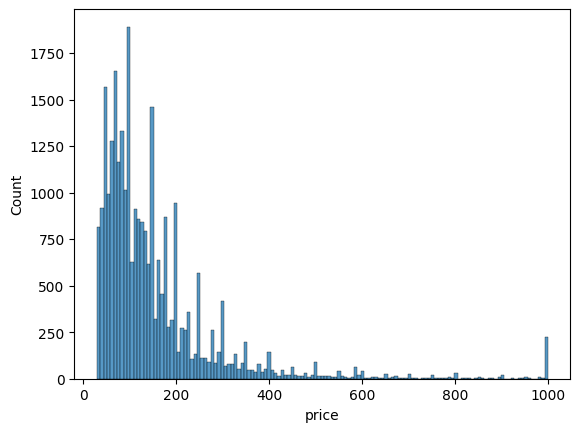

In [7]:
sns.histplot(data=df, x="price", log_scale = False)

<AxesSubplot: xlabel='price', ylabel='Count'>

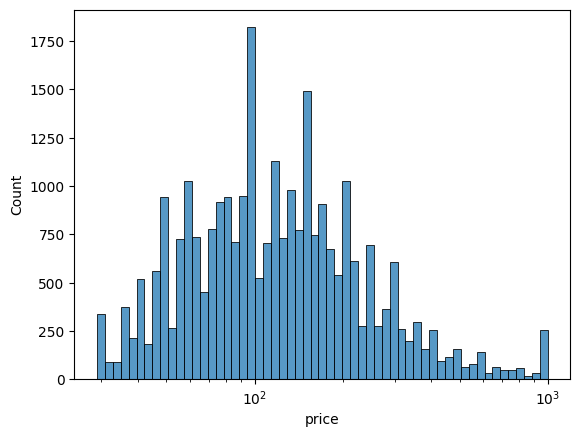

In [8]:
sns.histplot(data=df, x="price", log_scale = True)

This graph displays that price is rightly skewed. Having a skewed label might affect the model so I need to log the values. When I add a log transformation to price, the data seems to be better distributed. I debated the idea of performing a log transform on price and other columns that are rightly skewed. However, after discussing the idea with Sarah, it would not make much of a difference because I want to use random forest which uses trees. Moreover, since regression is going to incorporate using bins, the idea of scaling does not make sense. To expand, a bin is not removable just because it has fewer examples/is less popular than another. 

array([[<AxesSubplot: title={'center': 'host_response_rate'}>,
        <AxesSubplot: title={'center': 'host_acceptance_rate'}>,
        <AxesSubplot: title={'center': 'host_listings_count'}>,
        <AxesSubplot: title={'center': 'host_total_listings_count'}>,
        <AxesSubplot: title={'center': 'accommodates'}>,
        <AxesSubplot: title={'center': 'bathrooms'}>],
       [<AxesSubplot: title={'center': 'bedrooms'}>,
        <AxesSubplot: title={'center': 'beds'}>,
        <AxesSubplot: title={'center': 'price'}>,
        <AxesSubplot: title={'center': 'minimum_nights'}>,
        <AxesSubplot: title={'center': 'maximum_nights'}>,
        <AxesSubplot: title={'center': 'minimum_minimum_nights'}>],
       [<AxesSubplot: title={'center': 'maximum_minimum_nights'}>,
        <AxesSubplot: title={'center': 'minimum_maximum_nights'}>,
        <AxesSubplot: title={'center': 'maximum_maximum_nights'}>,
        <AxesSubplot: title={'center': 'minimum_nights_avg_ntm'}>,
        <AxesSubplot

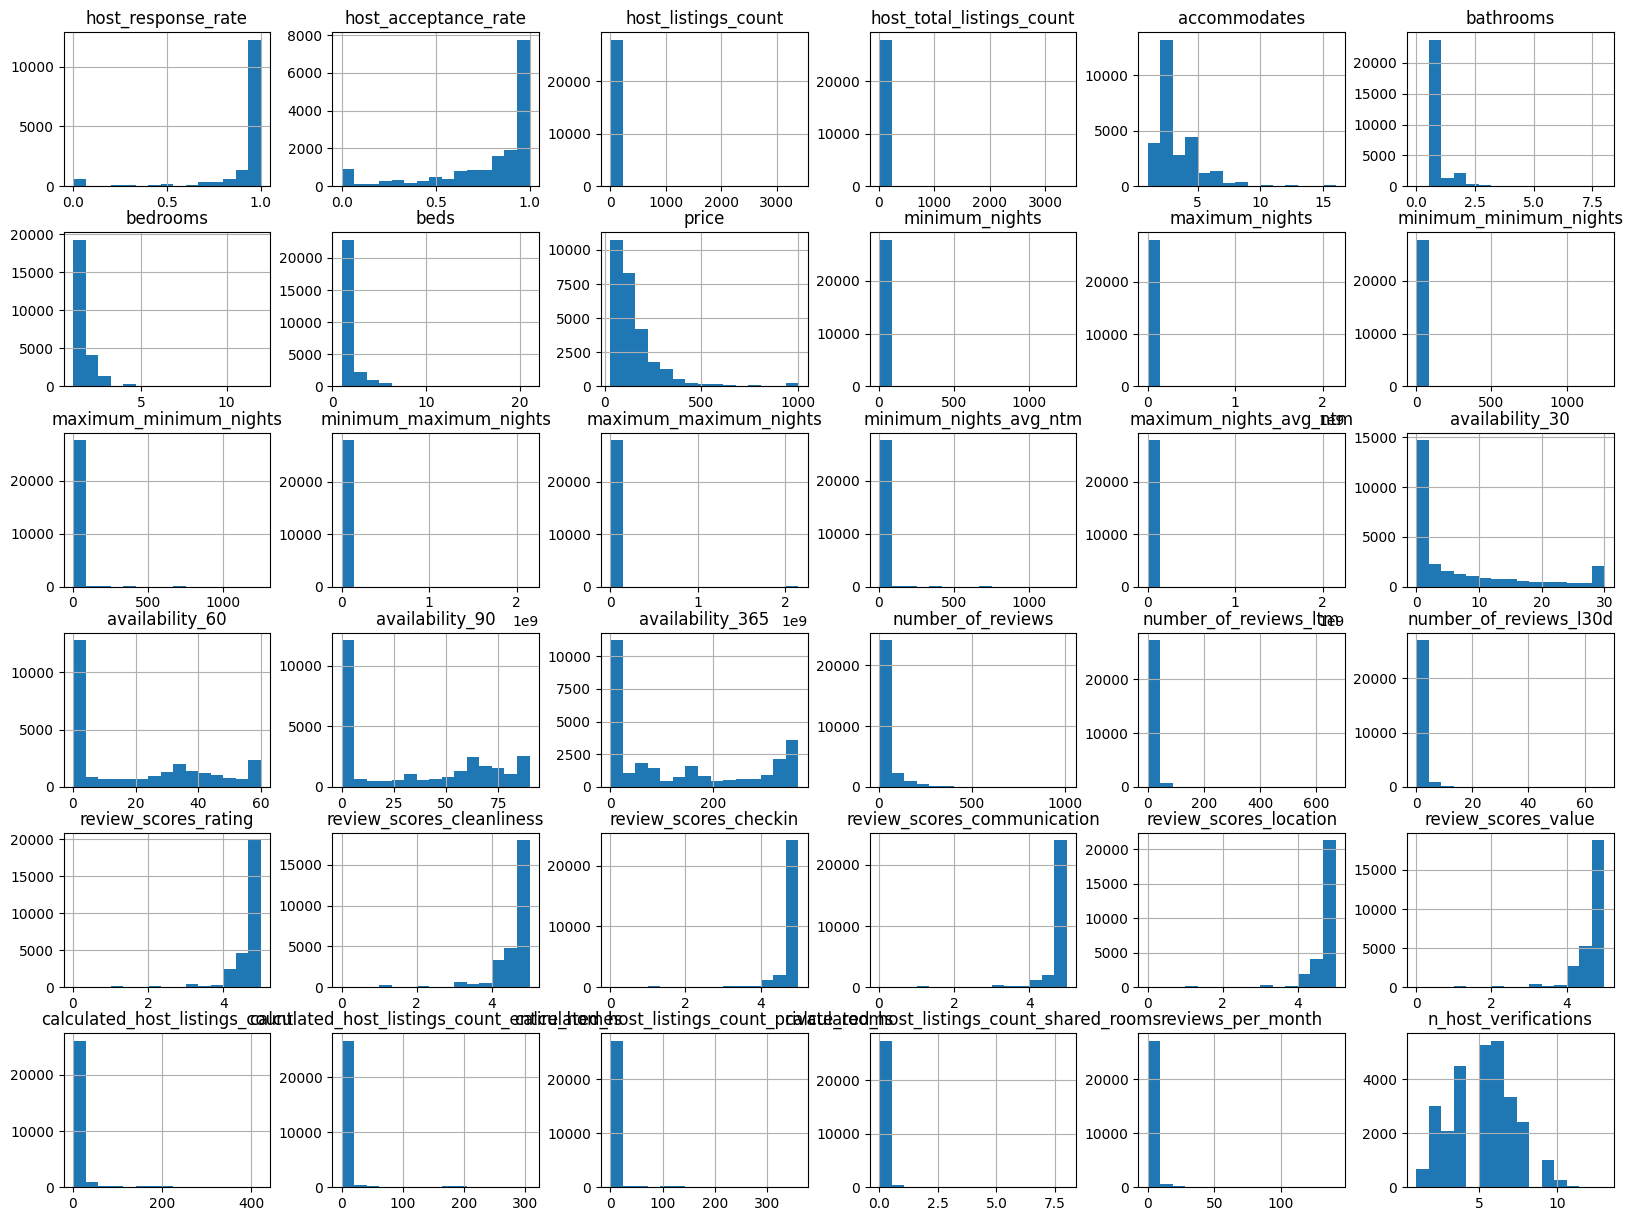

In [9]:
df.hist(bins=15, figsize=(20,15))

<AxesSubplot: >

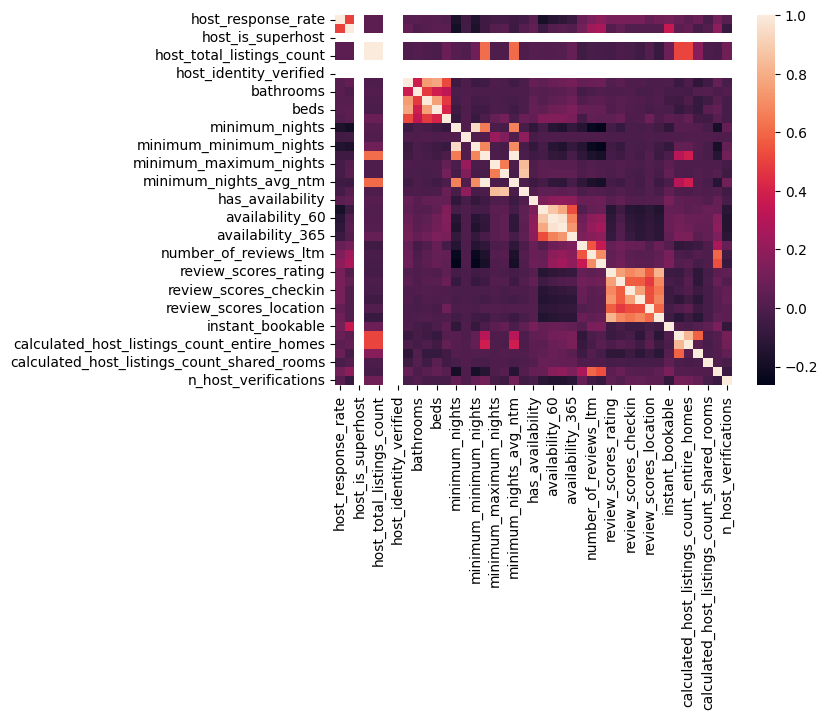

In [10]:
#lets find the correlation between variables to determine the best features to use.
sns.heatmap(df.corr())

In [11]:
print(df.corr()['price'])

host_response_rate                              0.006480
host_acceptance_rate                            0.037550
host_is_superhost                                    NaN
host_listings_count                             0.080995
host_total_listings_count                       0.080995
host_has_profile_pic                                 NaN
host_identity_verified                               NaN
accommodates                                    0.519057
bathrooms                                       0.331297
bedrooms                                        0.475506
beds                                            0.409236
price                                           1.000000
minimum_nights                                 -0.079945
maximum_nights                                 -0.001024
minimum_minimum_nights                         -0.071261
maximum_minimum_nights                         -0.007691
minimum_maximum_nights                          0.064011
maximum_maximum_nights         

There is a strong correlation between price and Accommodates, Bathrooms, Bedrooms, Beds. I am going to use these 4 features. I will not use the remaining columns numerical columns. Since correlation matrices are not as useful or accurate for categorical columns, I am going to manually observe two more features that logically should impact airbnb price: neighbourhood_group_cleansed and room_type.

<AxesSubplot: xlabel='room_type', ylabel='price'>

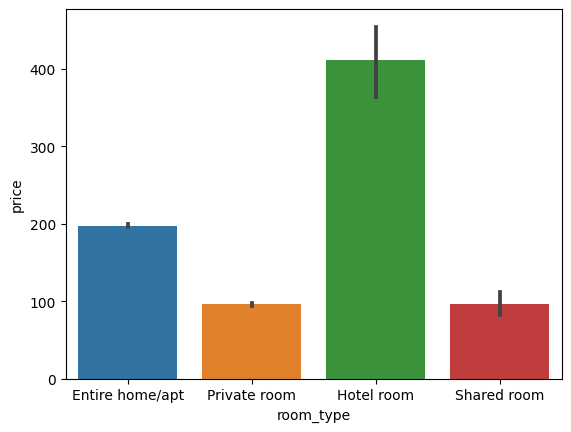

In [12]:
sns.barplot(df, x="room_type", y="price")

<AxesSubplot: xlabel='neighbourhood_group_cleansed', ylabel='price'>

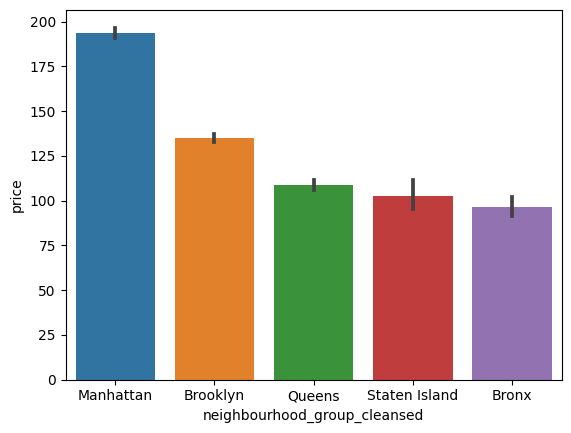

In [13]:
sns.barplot(df, x="neighbourhood_group_cleansed", y="price")

As I predicted, there are patterns with the label and the location of the airbnb (neighbourhood_group_cleansed) and the amount of area offered (room_type).

Attempting to determine outliers in my project is complicated considering the domain of the problem. In other problems, it would be easy to say anything in the top 1% and bottom 1% are outliers. However, the nightly price for an airbnb cannot be considered an outlier just because it is too expensive or not expensive. This is because the price depends on relationships with other variables. So an outlier of an airbnb's cost per night would be if the airbnb was a mansion with a lot of bedrooms and bathrooms but prices really cheap or an airbnb a one bedroom in a poor area is priced really high. In other words, an outlier is when the nightly price of an airbnb does not match it's value. I talked to my instructor about cases like this, and it is interesting because here, an outlier can be anything less representative of the market. In other words, we are purposely removing less seen examples even though they are logically correct examples. For example, if there is an airbnb priced at $1000 nightly and has 21 bedrooms, that is a valid nightly cost. However, such airbnbs are not representative of the airbnb market, so they can be removed. This will also simplify my model and tailor it to identifying the prices of airbnbs that have features/amenities that are most common.

Below I will find such amenities.

In [14]:
print(df['beds'].unique())
print("I will consider anything above 15 beds an outlier.\n")

print(df['bedrooms'].unique())
print("I will consider anything above 8 bedrooms an outlier.\n")

print(df['accommodates'].unique())
print("I will consider anything above 15 for number of people it can accommodate for as an outlier.\n")

print(df['bathrooms'].unique())
print("I will consider anything above 6.5 bathrooms an outlier.\n")

[ 1.  3.  2. nan  4.  6.  5. 10.  8. 18.  9.  7. 16. 12. 11. 21. 13.]
I will consider anything above 15 beds an outlier.

[nan  1.  2.  4.  3.  5.  8.  6.  7. 11.  9. 12.]
I will consider anything above 8 bedrooms an outlier.

[ 1  3  4  2  5  6  8 13 16  7 12  9 10 11 14 15]
I will consider anything above 15 for number of people it can accommodate for as an outlier.

[1.  1.5 2.  3.  2.5 4.  0.  4.5 5.5 3.5 5.  6.  6.5 8.  7.  7.5]
I will consider anything above 6.5 bathrooms an outlier.



<b> Considering fairness and ethics </b> I don't think any columns could suggest bias. The features I plan to use also are very objective. I have a small concern for neighbourhood_group_cleansed because maybe there is a bias against certain neighbourhoods. However, I don't think this will affect my project considering the domain. If I am price predicting, then I am speculating on what humans would price the airbnbs and humans have bias. For example, the data shows that airbnbs in the Bronx are priced much lower than Manhatten. This makes sense because humans tend to percieve the Bronx as a more dangerous area and Manhattan as a fancy area. These biases/opinions play into the pricing of the Airbnbs and we want our model to do the same. If there was gender

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

1. My feature list now includes accommodations, bathrooms, bedrooms, beds, neighbourhood_group_cleansed, and room_type. I decided to remove the other columns because according to the correlation matrix, they have good to poor correlation with price. Accomodates, bathrooms, bedrooms, and beds have a strong correlation with price (over 30-40%). I believe location and room type are also strong features because according to the bar plots, there are some trends. For example, airbnbs in Manhattan are much more expensive than the Bronx. Another pattern is that airbnbs that are a hotel or rent the entire property are priced higher than shared spaces. So clearly, location of the airbnb and the amount of space provided in an airbnb relate to price.

2. Since neighbourhood_group_cleansed and room_type are both categorical types of data, I need to convert these using one-hot encoding. I also want to log transform the label because it is rightly skewed. I need to replace NaN values in the feature columns with the feature's mean values. If the cateogorical values have NaN values, I will drop them.

3. I originally wanted to do linear regression, but after all t now I think that the pattern might be nonlinear. So, I will do random forest.

4. I am going to train my model with the optimal hyperparameters found using GridSearch. I will train my model using these hyperparameters. I will use the Root Mean Squared Error (RMSE) to determine the prediction accuracy. Based on this accuracy, I can attempt to improve the performance. I am going to try different combinations of values for the grid parameter. I hope this will generalize well because of grid search, but I am concerned a bit about overfitting. I will use cross validation to combat this.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

<h1> Preparing Data </h1>

In [16]:
#drop any columns where price is null
df = df.dropna(subset=['price']) 

<h2> Missing Values </h2> 
Having null values in feature columns with numeric types will create problems in our model. We need to replace these with their average. I need to round values because I cannot have bedrooms and beds that are fractional. Such a number would not make sense in this case.

In [17]:
df['bedrooms_na'] = df['bedrooms'].isnull()
df['beds_na'] = df['beds'].isnull()
df.head()

mean_bedrooms=df['bedrooms'].mean()
mean_bedrooms_rounded = round(mean_bedrooms)
print("mean value for bedrooms columns: " + str(mean_bedrooms_rounded))

mean_beds=df['beds'].mean()
mean_beds_rounded = round(mean_beds)
print("mean value for beds columns: " + str(mean_beds_rounded))

df['bedrooms'].fillna(value=mean_bedrooms_rounded, inplace=True)
df['beds'].fillna(value=mean_beds_rounded, inplace=True)

print(np.sum(df.isnull(), axis = 0))


mean value for bedrooms columns: 1
mean value for beds columns: 2
name                                                5
description                                       570
neighborhood_overview                            9816
host_name                                           0
host_location                                      60
host_about                                      10945
host_response_rate                              11843
host_acceptance_rate                            11113
host_is_superhost                                   0
host_listings_count                                 0
host_total_listings_count                           0
host_has_profile_pic                                0
host_identity_verified                              0
neighbourhood_group_cleansed                        0
room_type                                           0
accommodates                                        0
bathrooms                                           0
bedrooms        

In [18]:
df.head()

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications,bedrooms_na,beds_na
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,8.0,True,True,Manhattan,Entire home/apt,1,1.0,1.0,1.0,"[""Extra pillows and blankets"", ""Baking sheet"",...",150.0,30,1125,30.0,30.0,1125.0,1125.0,30.0,1125.0,True,3,33,63,338,48,0,0,4.70,4.62,4.76,4.79,4.86,4.41,False,3,3,0,0,0.33,9,True,False
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1.0,1.0,True,True,Brooklyn,Entire home/apt,3,1.0,1.0,3.0,"[""Extra pillows and blankets"", ""Luggage dropof...",75.0,1,730,1.0,1.0,730.0,730.0,1.0,730.0,True,3,6,18,194,409,32,0,4.45,4.49,4.78,4.80,4.71,4.64,False,1,1,0,0,4.86,6,False,False
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1.0,1.0,True,True,Brooklyn,Entire home/apt,4,1.5,2.0,2.0,"[""Kitchen"", ""BBQ grill"", ""Cable TV"", ""Carbon m...",275.0,5,1125,5.0,5.0,1125.0,1125.0,5.0,1125.0,True,3,3,12,123,2,1,0,5.00,5.00,5.00,5.00,4.50,5.00,False,1,1,0,0,0.02,3,False,False
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1.0,1.0,True,True,Manhattan,Private room,2,1.0,1.0,1.0,"[""Room-darkening shades"", ""Lock on bedroom doo...",68.0,2,14,2.0,2.0,14.0,14.0,2.0,14.0,True,1,16,34,192,507,33,2,4.21,3.73,4.66,4.42,4.87,4.36,False,1,0,1,0,3.68,4,False,False
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1.0,1.0,True,True,Manhattan,Private room,1,1.0,1.0,1.0,"[""Breakfast"", ""Carbon monoxide alarm"", ""Fire e...",75.0,2,14,2.0,2.0,14.0,14.0,2.0,14.0,True,0,0,0,0,118,0,0,4.91,4.82,4.97,4.95,4.94,4.92,False,1,0,1,0,0.87,7,False,False


<h2> Transforming Values </h2> 
Using one-hot encoding I am going to transform the neighbourhood_group_cleansed and room_type

In [19]:


df_Neighbourhood = pd.get_dummies(df['neighbourhood_group_cleansed'], prefix='Neighbourhood_')
df_Neighbourhood

df_Room = pd.get_dummies(df['room_type'], prefix='Room_')
df_Room

,Room__Entire home/apt,Room__Hotel room,Room__Private room,Room__Shared room
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
28017,0,0,1,0
28018,1,0,0,0
28019,0,0,1,0
28020,1,0,0,0


In [20]:
# Concatenate DataFrame df with the one-hot encoded DataFrame 
df = df.join(df_Neighbourhood)
df = df.join(df_Room)

# Remove the original columns from DataFrame df
df.drop(columns = 'neighbourhood_group_cleansed', inplace=True)
df.drop(columns = 'room_type', inplace=True)

In [21]:
df.columns

Index(['name', 'description', 'neighborhood_overview', 'host_name',
       'host_location', 'host_about', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'review_scores_rating',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_

In [22]:
df.shape

(28022, 59)

<h2> Handling Outliers </h2> 
Now I am going to handle the outliers I have defined above in the data exploration phase. 

In [23]:
#Now I am going to handle the outliers I have defined above.
beds_threshold = 15
bedrooms_threshold = 8
accommodates_threshold = 15
bathrooms_threshold = 6.5

# Apply the filters to remove outliers in place
df = df[
    (df['beds'] <= beds_threshold) &
    (df['bedrooms'] <= bedrooms_threshold) &
    (df['accommodates'] <= accommodates_threshold) &
    (df['bathrooms'] <= bathrooms_threshold)
]

df.shape


(27948, 59)

In [24]:
#to double check I am printing the unique values and ensuring none are higher than the thresholds we set.

print(df['beds'].unique())
print(df['bedrooms'].unique())
print(df['accommodates'].unique())
print(df['bathrooms'].unique())

[ 1.  3.  2.  4.  6.  5.  8.  9.  7. 12. 10. 11.]
[1. 2. 4. 3. 5. 6. 7.]
[ 1  3  4  2  5  6  8 13  7 12  9 10 11 14 15]
[1.  1.5 2.  3.  2.5 0.  4.5 3.5 5.  4.  5.5 6. ]


<h1>Fitting Data to Train</h1>

In [25]:
y = df['price'] 
features = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'Neighbourhood__Bronx', 'Neighbourhood__Brooklyn',	'Neighbourhood__Manhattan',	'Neighbourhood__Queens', 'Neighbourhood__Staten Island', 'Room__Entire home/apt', 'Room__Hotel room', 'Room__Private room', 
            'Room__Shared room']
X = df[features]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1234)

In [27]:
param_grid = {
         'min_samples_leaf': [10], #1, 2, 4 tested
         'min_samples_split': [20], #2, 5, 10 tested
         'n_estimators': [6000]
        }

 I am using cross validation here to avoid overfitting. With trees, the model tends to overfit. By adding cross validation, we are splitting our dataset into random groups, using one group as the test, and training the model on the remaining groups. I chose 3 so that the runtime will not bee too high. 

In [28]:
print('Running Grid Search...')

model = RandomForestRegressor()

grid = GridSearchCV(model, param_grid, cv=4)

grid_search = grid.fit(X_train, y_train)

print('Done')

Running Grid Search...
Done


In [29]:
best_msl = grid_search.best_estimator_.min_samples_leaf
best_mss = grid_search.best_estimator_.min_samples_split
best_n = grid_search.best_estimator_.n_estimators

# Print best performing hyperparameter configuration

print('Best value for the minimum number of samples required to be at a leaf node: {0}'
      .format(best_msl))
print('Best value for the minimum number of samples required to split: {0}'.format(best_mss))
print('Best value for n estimators: {0}'.format(best_n))

# Print best accuracy score resulting from this configuration
print('Accuracy score: {0}'.format(grid_search.best_score_))

Best value for the minimum number of samples required to be at a leaf node: 10
Best value for the minimum number of samples required to split: 20
Best value for n estimators: 6000
Accuracy score: 0.42968544774788936


In [33]:
model = RandomForestRegressor(min_samples_leaf = best_msl, min_samples_split = best_mss, n_estimators = best_n)

model.fit(X_train, y_train)

predictions = model.predict(X_test)

In [34]:
rmse = float(format(np.sqrt(mean_squared_error(y_test, predictions)), '.3f'))
print("\nRMSE: ", rmse)


RMSE:  105.786


In [34]:
from sklearn.model_selection import RandomizedSearchCV

random_grid = {
 'min_samples_leaf': [1, 2, 5, 10, 15, 20],
 'min_samples_split': [2, 5, 10, 15, 20],
 'n_estimators': [600, 800, 1000]}


print('Running Random Search...')

model2 = RandomForestRegressor()

random = RandomizedSearchCV(model2, random_grid, cv=7)

random_search = random.fit(X_train, y_train)

print('Done')


Running Random Search...
Done


In [35]:
random_search.best_params_

{'n_estimators': 800, 'min_samples_split': 5, 'min_samples_leaf': 10}

In [36]:
model2 = RandomForestRegressor(min_samples_leaf = 10, min_samples_split = 5, n_estimators = 800)

model2.fit(X_train, y_train)

predictions = model2.predict(X_test)

rmse = float(format(np.sqrt(mean_squared_error(y_test, predictions)), '.3f'))
print("\nRMSE: ", rmse)


RMSE:  105.783


In [37]:
print('Accuracy score: {0}'.format(random_search.best_score_))

Accuracy score: 0.4338790498719359


<h1>Feature Selection and Tuning Hyperparameters </h1>

My first grid search resulted me with parameters that resulted in a RMSE or 106.275. The resulting accuracy score was 0.4289212809611043. This RMSE is kind of high for this dataset and the accuracy is poor. I want to get the RSME to be lower than 50 and improve accuracy. Unfortunately, with the amount of hyperparameters I'm experimenting with, the runtime for the grid search is taking really long. I am going to use higher values for each parameter in the param_grid and test that out.

I used higher parameters this time, but it seems like I need to go even higher as the best values for each parameters were the highest numbers in the list. The accuracy slightly improved with  0.4324492576365353. The RMSE also improved with 105.764 but this is still not good enough.

On the third iteration, it seems like 20 was a good number for the min_samples_split. So I fixed that value and I am going to use higher values for the remaining hyperparameters. The result was that the best value for min_samples_leaf was 10. I am going to compare 10 and 15 to see which is better in the next round. It also seems that the highest n_estimators is the best value according to the grid search. This makes sense because the more trees, the better it learns the data. I used 8000 here and this was the best value. 

For the fourth try, I kept the min sample split as 20. Kept the min sample leaf as [10, 15] and the n_estimators is 6000. I made it lower because I was thought that even though the best value was 8000 according to the last run, the accuracy is not changing so this might mean the model is overfitting. So I also increased the cv from 3 to 4. This resulted in a lower accuracy of 0.42968544774788936 and a RMSE of 105.786. 

I began to look for other tuning methods online to help me out when I stumbled upon RandomizedSearchCV. I am going to try this out now. The benefit of this method is that it is faster than grid search because it is using random combinations. However, because they are random I don't know if it will lead to improvement. After performing this search, I was not able to find much success. The accuracy is 0.4324531139250161 and the RMSE is 105.754. Since I believed this is due to overfitting, I increased the cv to 7. However, this also kept the accuracy and RMSE stagnent. RMSE:  105.783 and Accuracy score: 0.4338790498719359. This concludes my efforts.

<h1> Analysis </h1>

This lab really pushed me to think. For one, I had to consider the domain of the project to determine what an outlier would be in this scenario. The domain came into the picture again when I had to replace NaN values with rounded averages because bed and bedrooms need to be integers. This once again called to keep the domain in mind. Another learning point was creating a regression model using Random Forest. In class, we have only done Random Forest Classifiers. So, I had to research on the internet how to implement this, things I have to keep in mind, which hyperparameters are most important for this model, etc. Being able to create a model that we have not done in class and also try new methods like random search is a highlight for me. 

I am disappointed with the accuracy being at 43%. While I did my best to improve the accuracy with grid search, it was difficult because it was extremely time-consuming. This is when I pivoted to something I discovered on the internet: random search. This is faster than grid search since it is not iterating through every single combination. I also increased the number of k-folds in cross validation to prevent overfitting. However, I did not find a lot of improvement here. 

I believe the reason for my low accuracies and poor generalization is because the model is overfitting. That is a common shortcoming with trees. If I were to expand on this project, I would attempt to solve this problem with a different model like linear regression or neural networks. I also realize that perhaps that considering the domain of this project, a combination of features would have a higher correlation to the price than alone. For example, neighbourhood_group_cleansed and room_type (location and amount of space) combined would be a better indicator of price than the columns alone. Think about it like this: A mansion in the Bronx is probably around the same nightly price as a hotel room in Manhatten. However, comparing the features individually, the Bronx would indicate a lower price while Manhatten would be higher and a mansion would be slightly more than a hotel room. 